In [ ]:
# helper function
import string

def all_digits(ch: str) -> bool:
    for i in ch:
        if(i not in string.digits and i!='-'):
            return False
    return True

In [ ]:
import math
dd = 4
q = 3329

x = []
for i in range(-3329,3329):
    x.append(math.floor(( dd / q )*i) % dd)


1

Compress function in the full range of input

[0, 105, 313, 521, 729, 937, 1145, 1353, 1561, 1769, 1977, 2185, 2393, 2601, 2809, 3017]


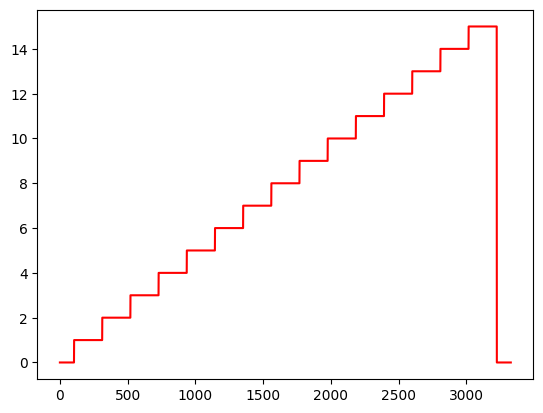

In [3]:
import matplotlib.pyplot as plt
import math
from ctypes import c_uint16, c_uint64

def compress(num: int, d: int, r: int) -> int:
    # x = c_uint16()
    x = num
    x = x + ((x >> 15) & 3329)
    # multiply by 2^d
    x = x << d
    # round the x
    x = x + 1665 - round((pow(2,r) / 3329) - int(pow(2,r) / 3329))
    # division by invariant multiplication
    x = x * round(pow(2,r) / 3329) # 2^28 / 3329
    x = x >> r
    x = x & ((1 << d) - 1)
    return x

def compress_math(num: int, d: int) -> int:
    return math.floor(num * ( pow(2,d) / 3329 )) % pow(2,d)

x = []
y4 = []
y5 = []
y10 = []
y11 = []
xx = []
yy = []
ll = -1
DD = 4
RR = 28
for i in range(0,3329):
    x.append(i)
    y4.append(compress(i, 4, 28))
    y5.append(compress(i, 5, 27))
    y10.append(compress(i, 10, 32))
    y11.append(compress(i, 11, 31))
    if(compress(i, DD, RR) > ll):
        xx.append(i)
        ll = compress(i, DD, RR)
    yy.append(compress_math(i, DD))

# plt.rcParams.update({'font.size': 15})
fig = plt.figure() #figsize=(20,10) 
a = fig.add_subplot(111)
lines = a.plot(x, y4, color='r')
# lines = a.plot(x, y5, color='g')
# lines = a.plot(x, y10, color='b')
print(xx)
# lines = a.plot(x, y11, color='m')
# plt.plot(x, yy, ',', color = 'g')
# ax = lines[0].axes
# ax.set_xticks(list(ax.get_xticks()) + xx)
# plt.savefig("compress.png", dpi=300)
plt.show()

the code translate (interactive)

mathematically doing the compress

In [22]:
import math

d = 4
q = 3329
dd = 1 << d
print("d: %d" % d)
while(1):
    str = input("enter the number: ")
    x = int(str)
    # todo: how to do this without floating point involved?
    xx = math.floor(( dd / q )*x) % dd
    print(xx)

d: 4
0
15


ValueError: invalid literal for int() with base 10: ''

In [1]:
# change setting here
d = 10
r = 32
# interactive 
while(1):
    st = input()
    if(all_digits(st) == False):
        continue
    x = int(st)
    print(compress(x,10,32))

ValueError: invalid literal for int() with base 10: ''